# Part - 3

## 0.0 Imports

In [2]:
#imports
import json
import datetime
import pandas as pd
import tweepy
import json
import math
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import *
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

#necessary library imports
import networkx as nx
import matplotlib.pyplot as plt
import community
from collections import defaultdict
import random
from networkx.drawing.nx_agraph import graphviz_layout 

import io
import pandas as pd

#"""one time downloads"""

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.download('movie_reviews')
#nltk.download("opinion_lexicon")

## 1.0 Loading Data

In [4]:
# Create empty lists for each column
src_list = []
tgt_list = []
vot_list = []
res_list = []
yea_list = []
dat_list = []
txt_list = []


# Read the text file line by line
with open('wiki-RfA.txt', 'r', encoding = "utf-8") as f:
    for line in f:
        
        # Extract the SRC, TGT, and TXT columns from each line
        if line.startswith('SRC:'):
            src_list.append(line.strip()[4:])
        elif line.startswith('TGT:'):
            tgt_list.append(line.strip()[4:])
        elif line.startswith('VOT:'):
            vot_list.append(line.strip()[4:])
        elif line.startswith('RES:'):
            res_list.append(line.strip()[4:])
        elif line.startswith('YEA:'):
            yea_list.append(line.strip()[4:])
        elif line.startswith('DAT:'):
            dat_list.append(line.strip()[4:])
        elif line.startswith('TXT:'):
            txt_list.append(line.strip()[4:])

# Create a Pandas dataframe with the extracted columns
df = pd.DataFrame({'SRC': src_list, 'TGT': tgt_list, 'VOT':vot_list, 'RES':res_list, 'YEA':yea_list, 'DAT':dat_list,'TXT': txt_list})

In [3]:
df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps."


In [4]:
df.shape

(198275, 7)

## 2.0 Preprocessing

### 2.1 Extracting text

In [6]:
# Just extracting text column since we don't need other columns for this analysis 

new_df = pd.DataFrame(df["TXT"])
new_df = new_df.reset_index(drop = True)
new_df.head()

,TXT
0,'''Support''' as co-nom.
1,'''Support''' as nominator.--
2,'''Support''' per noms.
3,'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.
4,"'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps."


### 2.2 Removing stop words

In [7]:
#creating the stopwords set
stopwordset = set(nltk.corpus.stopwords.words('english'))

# lambda function to remove stop words and unnecessary characters from each tokenized sentence
def remove_stopwords(sentence):
    #tokenize 
    sentence = nltk.word_tokenize(sentence)
    # convert all words to lower case and remove the punctutations as well
    output = [word.lower() for word in sentence if word.lower() not in stopwordset and len(word) > 1]
    #print(words_out)
    return " ".join(output)

# apply the remove_stopwords function to the "text" column
new_df["cleaned"] = new_df["TXT"].apply(lambda x: remove_stopwords(x))
new_df.head()

,TXT,cleaned
0,'''Support''' as co-nom.,'' 'support '' co-nom
1,'''Support''' as nominator.--,'' 'support '' nominator. --
2,'''Support''' per noms.,'' 'support '' per noms
3,'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.,'' 'support '' per noms bdd strong contributor thousands edits years experience problem supporting
4,"'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps.",'' 'support '' great pleasure work bdd wp goce|guild copy editors 're coordinators seen good work rm afd fine addition admin corps


## 3.0 Sentiment Analysis

## 3.1 NLTK Analyzer

In [8]:
#Importing the sentiment intensity analyzer and storing the scores for each tweet
analyzier = nltk.sentiment.vader.SentimentIntensityAnalyzer()
sentiment_scores = []

for i in range(len(new_df)):
    data_dictionary = analyzier.polarity_scores(new_df['cleaned'][i])
    data_dictionary['sentence'] = new_df['TXT'][i]
    sentiment_scores += [data_dictionary]
    
new_df_scores = pd.DataFrame(sentiment_scores)
new_df_scores.head()

,neg,neu,pos,compound,sentence
0,0.000,0.526,0.474,0.4019,'''Support''' as co-nom.
1,0.000,0.597,0.403,0.4019,'''Support''' as nominator.--
2,0.000,0.597,0.403,0.4019,'''Support''' per noms.
3,0.125,0.463,0.412,0.7351,'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.
4,0.000,0.482,0.518,0.9451,"'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps."


## 3.2 Sentiment Analysis based on Individual score

### 3.2.1  Top 5 Positive tweets

In [19]:
new_df_scores.sort_values("pos", ascending=False).head()

,neg,neu,pos,compound,sentence,sentiment_label
172581,0.0,0.0,1.0,0.7184,Strong support.,positive
25341,0.0,0.0,1.0,0.6124,"Yes, please.",positive
59130,0.0,0.0,1.0,0.2023,Will do fine.,neutral
176704,0.0,0.0,1.0,0.3182,Cool.,neutral
138018,0.0,0.0,1.0,0.3182,Cool.,neutral


### 3.2.2  Top 5 Neutral tweets

In [10]:
new_df_scores.sort_values("neu", ascending=False).head()

,neg,neu,pos,compound,sentence
65201,0.0,1.0,0.0,0.0,Per above. ''
158054,0.0,1.0,0.0,0.0,"'''Oppose''' per [[User talk:Cuivienen|Cuivienen]] & must wait for a few months. [[Image:Flag of India.svg|20px]]<b>[[User:Srikeit|Srik]]<font color=""green"">[[User:Srikeit/Esperanza|e]]</font>"
189514,0.0,1.0,0.0,0.0,'''Oppose''' per Astrotrain.
125578,0.0,1.0,0.0,0.0,"'''Oppose''', placed false barnstars on her pages."
189513,0.0,1.0,0.0,0.0,'''Oppose'''- hasn't been here long enough.


### 3.2.3 Top 5 Negative tweets

In [11]:
new_df_scores.sort_values("neg", ascending=False).head()

,neg,neu,pos,compound,sentence
93026,1.0,0.0,0.0,-0.4019,No problems here.
197813,1.0,0.0,0.0,-0.0772,"Sorry, No."
64135,1.0,0.0,0.0,-0.6808,Why the hell not.
42104,1.0,0.0,0.0,-0.6808,Why the hell not?
10515,1.0,0.0,0.0,-0.3612,No Regrets. -


### 3.3 Sentiment Analysis based on compound score

In [12]:
#creating cuttoffs for distinction based on compound score
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "negative"
    elif row.compound > cutoff:
        return "positive"
    else:
        return "neutral"
        
#creating label based on cutoffs    
new_df_scores["sentiment_label"] = new_df_scores.apply(label_sentiment, axis=1)
new_df_scores.head()

,neg,neu,pos,compound,sentence,sentiment_label
0,0.000,0.526,0.474,0.4019,'''Support''' as co-nom.,neutral
1,0.000,0.597,0.403,0.4019,'''Support''' as nominator.--,neutral
2,0.000,0.597,0.403,0.4019,'''Support''' per noms.,neutral
3,0.125,0.463,0.412,0.7351,'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.,positive
4,0.000,0.482,0.518,0.9451,"'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps.",positive


### 3.3.1 Top 5  tweets

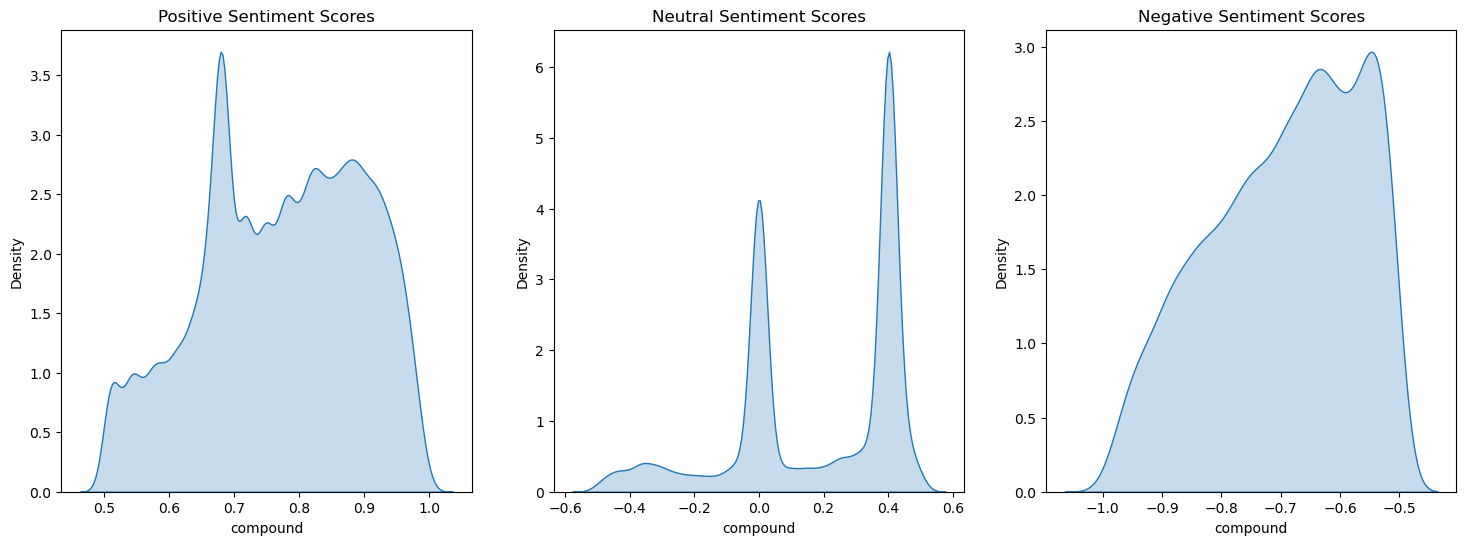

In [16]:
plt.figure(figsize=(18, 6))

# Plot positive sentiment scores
plt.subplot(131)
sns.kdeplot(new_df_scores[new_df_scores.sentiment_label=="positive"].compound, shade=True)
plt.title("Positive Sentiment Scores")

# Plot neutral sentiment scores
plt.subplot(132)
sns.kdeplot(new_df_scores[new_df_scores.sentiment_label=="neutral"].compound, shade=True)
plt.title("Neutral Sentiment Scores")

# Plot negative sentiment scores
plt.subplot(133)
sns.kdeplot(new_df_scores[new_df_scores.sentiment_label=="negative"].compound, shade=True)
plt.title("Negative Sentiment Scores")

plt.show()

# For 2013 Data

In [5]:
# 2013 year graph
new_df = df.loc[df['YEA'] == '2013']

#creating the stopwords set
stopwordset = set(nltk.corpus.stopwords.words('english'))

# lambda function to remove stop words and unnecessary characters from each tokenized sentence
def remove_stopwords(sentence):
    #tokenize 
    sentence = nltk.word_tokenize(sentence)
    # convert all words to lower case and remove the punctutations as well
    output = [word.lower() for word in sentence if word.lower() not in stopwordset and len(word) > 1]
    #print(words_out)
    return " ".join(output)

# apply the remove_stopwords function to the "text" column
new_df["TXT"] = new_df["TXT"].apply(lambda x: remove_stopwords(x))
new_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'' 'support '' co-nom
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'' 'support '' nominator. --
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'' 'support '' per noms
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'' 'support '' per noms bdd strong contributor thousands edits years experience problem supporting
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013",'' 'support '' great pleasure work bdd wp goce|guild copy editors 're coordinators seen good work rm afd fine addition admin corps


In [6]:
#Importing the sentiment intensity analyzer and storing the scores for each tweet
analyzier = nltk.sentiment.vader.SentimentIntensityAnalyzer()
sentiment_scores = []

for i in range(len(new_df)):
    data_dictionary = analyzier.polarity_scores(new_df['TXT'][i])
    data_dictionary['TXT'] = new_df['TXT'][i]
    data_dictionary['VOT'] = new_df['VOT'][i]
    data_dictionary['RES'] = new_df['RES'][i]
    data_dictionary['SRC'] = new_df['SRC'][i]
    data_dictionary['TGT'] = new_df['TGT'][i]
    sentiment_scores += [data_dictionary]
    
new_df_scores = pd.DataFrame(sentiment_scores)

#creating cuttoffs for distinction based on compound score
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "negative"
    elif row.compound > cutoff:
        return "positive"
    else:
        return "neutral"
        
#creating label based on cutoffs    
new_df_scores["sentiment_label"] = new_df_scores.apply(label_sentiment, axis=1)
new_df_scores.head()

,neg,neu,pos,compound,TXT,VOT,RES,SRC,TGT,sentiment_label
0,0.000,0.526,0.474,0.4019,'' 'support '' co-nom,1,1,Steel1943,BDD,neutral
1,0.000,0.597,0.403,0.4019,'' 'support '' nominator. --,1,1,Cuchullain,BDD,neutral
2,0.000,0.597,0.403,0.4019,'' 'support '' per noms,1,1,INeverCry,BDD,neutral
3,0.125,0.463,0.412,0.7351,'' 'support '' per noms bdd strong contributor thousands edits years experience problem supporting,1,1,Cncmaster,BDD,positive
4,0.000,0.482,0.518,0.9451,'' 'support '' great pleasure work bdd wp goce|guild copy editors 're coordinators seen good work rm afd fine addition admin corps,1,1,Miniapolis,BDD,positive


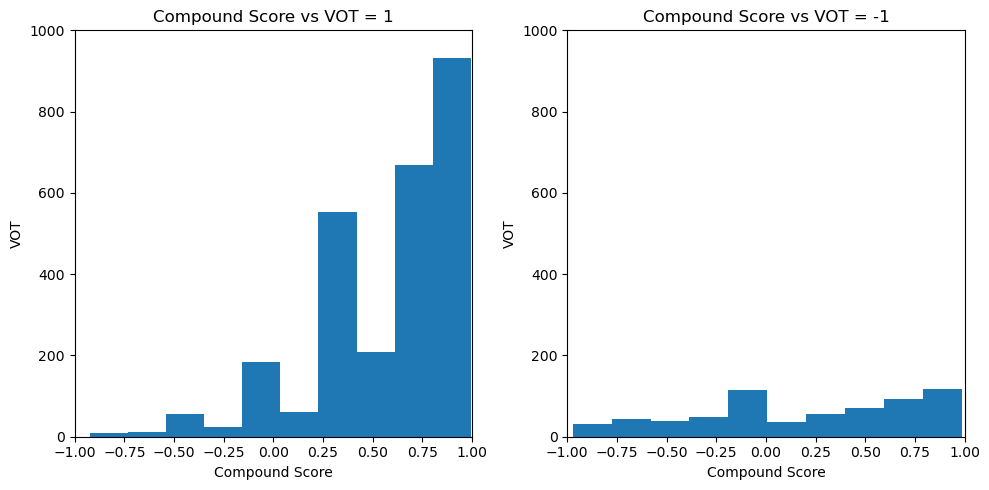

In [7]:
# Filter the data based on VOT value
data_vot1 = new_df_scores[new_df_scores['VOT'] == '1']
data_vot_neg1 = new_df_scores[new_df_scores['VOT'] == '-1']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram for compound score vs VOT = 1
axs[0].hist(data_vot1['compound'])
axs[0].set_title('Compound Score vs VOT = 1')
axs[0].set_xlabel('Compound Score')
axs[0].set_ylabel('VOT')
axs[0].set_xlim([-1, 1])
axs[0].set_ylim([0, 1000])

# Create a histogram for compound score vs VOT = -1
axs[1].hist(data_vot_neg1['compound'])
axs[1].set_title('Compound Score vs VOT = -1')
axs[1].set_xlabel('Compound Score')
axs[1].set_ylabel('VOT')
axs[1].set_xlim([-1, 1])
axs[1].set_ylim([0, 1000])

# Display the plots
plt.tight_layout()
plt.show()

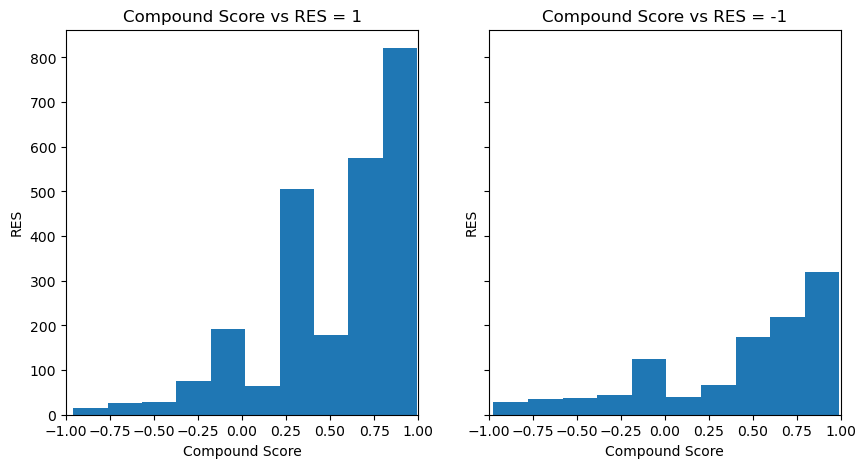

In [8]:
# Filter the data based on RES value
data_res1 = new_df_scores[new_df_scores['RES'] == '1']
data_res_neg1 = new_df_scores[new_df_scores['RES'] == '-1']

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

# Create a histogram for compound score vs RES = 1 on the left subplot
ax1.hist(data_res1['compound'])
ax1.set_title('Compound Score vs RES = 1')
ax1.set_xlabel('Compound Score')
ax1.set_ylabel('RES')

# Create a histogram for compound score vs RES = -1 on the right subplot
ax2.hist(data_res_neg1['compound'])
ax2.set_title('Compound Score vs RES = -1')
ax2.set_xlabel('Compound Score')
ax2.set_ylabel('RES')

# Set the x-axis range to be the same for both subplots

ax1.set_xlim(-1, 1)
ax2.set_xlim(-1, 1)

# Show the plot
plt.show()